# Tarea 1

**Autor:** Alejandro Zarate Macias  
**Curso:** Reconocimiento de Patrones (ML)
**Fecha:** 02 de Febrero 2026

---

## Introducción
En este trabajo se abordan distintos problemas de regresión lineal y polinomial aplicados al reconocimiento de patrones. Se utilizan tanto conjuntos de datos reales como funciones analíticas para analizar el comportamiento de los modelos de regresión bajo diferentes configuraciones. Se estudia el efecto del grado del polinomio, el número de iteraciones y la inclusión de regularización L1 y L2. Finalmente, se emplean curvas de aprendizaje para evaluar el desempeño de los modelos y analizar fenómenos de subajuste y sobreajuste.

---

## Pre-requisitos
- Python 3.9 o superior
- Librerías:
    - numpy
    - matplotlib
    - notebook
    - pandas
    - scikit-learn
    - kagglehub[pandas-datasets]
    - ipywidgets

---

## Carga de Datos
Se utiliza el conjunto de datos `2022 Fuel Consumption Ratings` disponible en Kaggle. Para facilitar la descarga de estos mismos, se implementa la funcion `get_dataset` para ser reutilizada por los problemas en los que se requiera.

In [1]:
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter

def get_dataset() -> pd.DataFrame:
    file_path = "MY2022 Fuel Consumption Ratings.csv"

    df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "rinichristy/2022-fuel-consumption-ratings",
    file_path
    )
    return df

---

# Problema 1

Considere el conjunto de datos de `2022 Fuel Consumption Ratings`. Elabore un script en Python para resolver el problema de regresión asociado con la predicción del consumo de combustible en ciudad y en carretera utilizando sklearn. Puede usar dos modelos lineales separados, uno para cada categoría de consumo de combustible. Escriba todas las suposiciones y las operaciones de preprocesamiento de datos que realice.

In [2]:
# Librerias necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Carga de datos y exploracion
df = get_dataset()
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         946 non-null    int64  
 1   Make                               946 non-null    object 
 2   Model                              946 non-null    object 
 3   Vehicle Class                      946 non-null    object 
 4   Engine Size(L)                     946 non-null    float64
 5   Cylinders                          946 non-null    int64  
 6   Transmission                       946 non-null    object 
 7   Fuel Type                          946 non-null    object 
 8   Fuel Consumption (City (L/100 km)  946 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 11  Fuel Consumption(Comb (mpg))       946 non-null    int64  

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


In [4]:
# Analisis de variables categóricas
# Se imprime el numero distinto de valores por cada variable categórica
# Esto con el fin de decidir que variables se pueden usar en el modelo sin aumentar demasiado la dimensionalidad

for column in df.select_dtypes(include=['object']).columns:
    print(f"Column: {column}")
    print(f"Número de valores distintos:", df[column].nunique())
    print()

Column: Make
Número de valores distintos: 39

Column: Model
Número de valores distintos: 715

Column: Vehicle Class
Número de valores distintos: 14

Column: Transmission
Número de valores distintos: 23

Column: Fuel Type
Número de valores distintos: 4



In [5]:
# Seleccion de features y variables objetivo

# X:
# Variables numericas: 'Engine Size(L)', 'Cylinders'
# Variables categoricas: 'Vehicle Class', 'Transmission', 'Fuel Type'
X = df[['Engine Size(L)', 'Cylinders', 
        'Vehicle Class', 'Transmission', 'Fuel Type']]

# Manejo de variables categoricas con get_dummies
X = pd.get_dummies(X, columns=['Vehicle Class', 'Transmission', 'Fuel Type'], drop_first=True)


# y:
# Para el modelo de consumo en ciudad
y_city = df['Fuel Consumption (City (L/100 km)']

# Para el modelo de consumo en carretera
y_hwy = df['Fuel Consumption(Hwy (L/100 km))']

In [6]:
# Split de datos en entrenamiento y prueba
X_train_city, X_test_city, y_train_city, y_test_city = train_test_split(X, y_city, test_size=0.2, random_state=14)
X_train_hwy, X_test_hwy, y_train_hwy, y_test_hwy = train_test_split(X, y_hwy, test_size=0.2, random_state=14)

In [7]:
# Modelo para consumo en ciudad
model_city = LinearRegression()
model_city.fit(X_train_city, y_train_city)

y_city_train_pred = model_city.predict(X_train_city)
y_city_test_pred = model_city.predict(X_test_city)

print("=== Modelo Ciudad ===")
print(f"Train - MSE: {mean_squared_error(y_train_city, y_city_train_pred):.4f}, R2: {r2_score(y_train_city, y_city_train_pred):.4f}")
print(f"Test  - MSE: {mean_squared_error(y_test_city, y_city_test_pred):.4f}, R2: {r2_score(y_test_city, y_city_test_pred):.4f}")

=== Modelo Ciudad ===
Train - MSE: 1.6035, R2: 0.8697
Test  - MSE: 1.3690, R2: 0.8663


In [8]:
# Modelo para consumo en carretera
model_hwy = LinearRegression()
model_hwy.fit(X_train_hwy, y_train_hwy)

y_hwy_train_pred = model_hwy.predict(X_train_hwy)
y_hwy_test_pred = model_hwy.predict(X_test_hwy)

print("=== Modelo Carretera===")
print(f"Train - MSE: {mean_squared_error(y_train_hwy, y_hwy_train_pred):.4f}, R2: {r2_score(y_train_hwy, y_hwy_train_pred):.4f}")
print(f"Test  - MSE: {mean_squared_error(y_test_hwy, y_hwy_test_pred):.4f}, R2: {r2_score(y_test_hwy, y_hwy_test_pred):.4f}")

=== Modelo Carretera===
Train - MSE: 1.0452, R2: 0.8084
Test  - MSE: 0.9527, R2: 0.7752


---

# Problema 2

Resuelva el problema 1 utilizando las ecuaciones normales de regresión lineal. Compare las soluciones de ambos problemas y anote sus conclusiones.

In [9]:
# Librerias necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
# Cargar datos
df = get_dataset()

In [11]:
# Seleccionamos las features y variables objetivo como en el problema anterior

X = df[['Engine Size(L)', 'Cylinders', 
        'Vehicle Class', 'Transmission', 'Fuel Type']]
X = pd.get_dummies(X, columns=['Vehicle Class', 'Transmission', 'Fuel Type'], drop_first=True)


y_city = df['Fuel Consumption (City (L/100 km)']
y_hwy = df['Fuel Consumption(Hwy (L/100 km))']

# Split de datos en entrenamiento y prueba
X_train_city, X_test_city, y_train_city, y_test_city = train_test_split(X, y_city, test_size=0.2, random_state=14)
X_train_hwy, X_test_hwy, y_train_hwy, y_test_hwy = train_test_split(X, y_hwy, test_size=0.2, random_state=14)

In [12]:
# Agregar columna de 1s para el intercepto
X_train_b = np.c_[np.ones(X_train_city.shape[0]), X_train_city]
X_test_b = np.c_[np.ones(X_test_city.shape[0]), X_test_city]

# Cast a float64
X_train_b = X_train_b.astype(np.float64)
X_test_b = X_test_b.astype(np.float64)

In [13]:
# Ecuaciones normales para modelo ciudad
# θ = (X^T X)^(-1) X^T y
theta_city = np.linalg.pinv(X_train_b.T @ X_train_b) @ X_train_b.T @ y_train_city
y_city_train_pred = X_train_b @ theta_city
y_city_test_pred = X_test_b @ theta_city

print("=== Modelo Ciudad ===")
print(f"Train - MSE: {mean_squared_error(y_train_city, y_city_train_pred):.4f}, R2: {r2_score(y_train_city, y_city_train_pred):.4f}")
print(f"Test  - MSE: {mean_squared_error(y_test_city, y_city_test_pred):.4f}, R2: {r2_score(y_test_city, y_city_test_pred):.4f}")

=== Modelo Ciudad ===
Train - MSE: 1.6035, R2: 0.8697
Test  - MSE: 1.3690, R2: 0.8663


In [14]:
# Ecuaciones normales para modelo carretera
# θ = (X^T X)^(-1) X^T y
theta_highway = np.linalg.pinv(X_train_b.T @ X_train_b) @ X_train_b.T @ y_train_hwy
y_highway_train_pred = X_train_b @ theta_highway
y_highway_test_pred = X_test_b @ theta_highway

print("=== Modelo Carretera ===")
print(f"Train - MSE: {mean_squared_error(y_train_hwy, y_highway_train_pred):.4f}, R2: {r2_score(y_train_hwy, y_highway_train_pred):.4f}")
print(f"Test  - MSE: {mean_squared_error(y_test_hwy, y_highway_test_pred):.4f}, R2: {r2_score(y_test_hwy, y_highway_test_pred):.4f}")

=== Modelo Carretera ===
Train - MSE: 1.0452, R2: 0.8084
Test  - MSE: 0.9527, R2: 0.7752


---

# Problema 3

Considere la siguiente función:

$f(x) = 2^{\cos(x^2)}, \qquad x \in \mathcal{I} = [-\pi, \pi].$

El objetivo es aproximar $f$ mediante un modelo polinomial

$h(x;\theta,n) = \sum_{j=0}^{n} \theta_j x^{j}, 
\qquad 
\theta = (\theta_0, \theta_1, \ldots, \theta_n)^T,$

para un orden adecuado \(n\). Elabore un script en Python para resolver el problema de regresión asociado. Observe que el conjunto de datos $D$ consiste en un muestreo de $f$ en $\mathcal{I}$ de tamaño $m$. Escriba todas las suposiciones que realice. Además, escriba los hiperparámetros de optimización que elija y explique por qué los seleccionó de esa manera. Incluya una gráfica del error vs iteraciones y una gráfica de la solución. No olvide indicar qué valor de $n$ elige y por qué.

In [15]:
# Librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
# Generar datos
np.random.seed(14)
m = 1000
x = np.linspace(-np.pi, np.pi, m)
y = 2 ** np.cos(x ** 2)

In [17]:
# Grado del polinomio
n = 12

In [18]:
# Crear matriz de caracteristicas
def create_poly_features(x, degree):
    X = np.column_stack([x ** j for j in range(degree + 1)])
    return X

X = create_poly_features(x, n)

In [19]:
# Normalizar features
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_std[X_std == 0] = 1
X_norm = (X - X_mean) / X_std

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

# Hiperparametros
learning_rate = 0.1
n_iterations = 1000
theta = np.zeros(n + 1)

In [20]:
# Gradiente descendente
errors_train = []
errors_test = []

for i in range(n_iterations):
    # Predicción
    y_pred_train = X_train @ theta
    
    # Gradiente: (1/m) * X^T * (Xθ - y)
    gradient = (1 / len(y_train)) * X_train.T @ (y_pred_train - y_train)
    
    # Actualizar theta
    theta = theta - learning_rate * gradient
    
    # Guardar error
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, X_test @ theta)
    errors_train.append(mse_train)
    errors_test.append(mse_test)


In [21]:
# Predicciones finales
y_train_pred = X_train @ theta
y_test_pred = X_test @ theta

print(f"=== Regresión Polinomial (Gradiente Descendente) n={n} ===")
print(f"Hiperparametros: lr={learning_rate}, iteraciones={n_iterations}")
print(f"Train - MSE: {mean_squared_error(y_train, y_train_pred):.6f}, R2: {r2_score(y_train, y_train_pred):.4f}")
print(f"Test  - MSE: {mean_squared_error(y_test, y_test_pred):.6f}, R2: {r2_score(y_test, y_test_pred):.4f}")

=== Regresión Polinomial (Gradiente Descendente) n=12 ===
Hiperparametros: lr=0.1, iteraciones=1000
Train - MSE: 1.746476, R2: -4.2335
Test  - MSE: 1.705904, R2: -4.5525


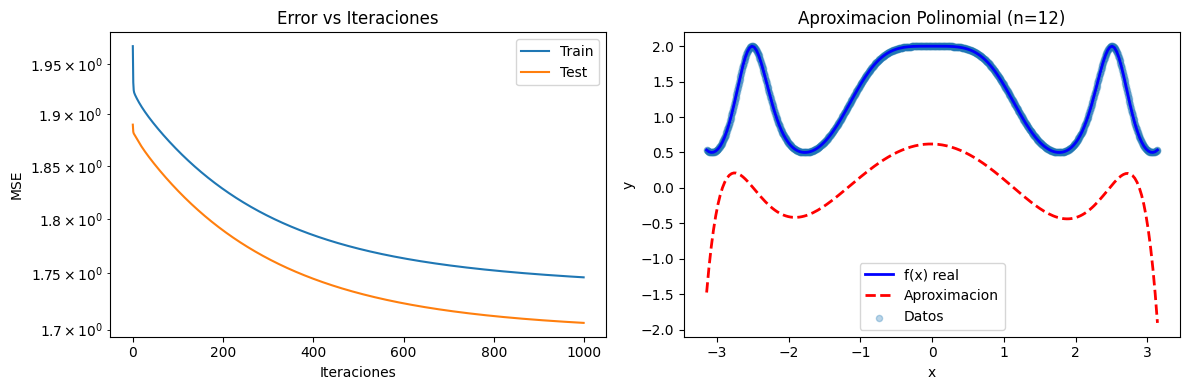

In [22]:
# Gráfica Error vs Iteraciones
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(errors_train, label='Train')
axes[0].plot(errors_test, label='Test')
axes[0].set_xlabel('Iteraciones')
axes[0].set_ylabel('MSE')
axes[0].set_title('Error vs Iteraciones')
axes[0].legend()
axes[0].set_yscale('log')

# Gráfica de la solución
x_plot = np.linspace(-np.pi, np.pi, 200)
X_plot = create_poly_features(x_plot, n)
X_plot_norm = (X_plot - X_mean) / X_std
y_plot_pred = X_plot_norm @ theta
y_true = 2 ** np.cos(x_plot ** 2)

axes[1].plot(x_plot, y_true, 'b-', label='f(x) real', linewidth=2)
axes[1].plot(x_plot, y_plot_pred, 'r--', label='Aproximacion', linewidth=2)
axes[1].scatter(x, y, alpha=0.3, s=20, label='Datos')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title(f'Aproximacion Polinomial (n={n})')
axes[1].legend()

plt.tight_layout()
plt.show()

---

# Problema 4

Resuelva el problema 3 utilizando el modelo de regresión polinomial de sklearn. Compare las soluciones de ambos problemas y escriba sus conclusiones.

In [23]:
# Librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [24]:
# Generar datos (mismos que Problema 3)
np.random.seed(14)
m = 1000
x = np.linspace(-np.pi, np.pi, m).reshape(-1, 1)
y = 2 ** np.cos(x.flatten() ** 2)

In [25]:
# Split train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Grado del polinomio (mismo que Problema 3)
n = 12

In [26]:
# Modelo con PolynomialFeatures
poly = PolynomialFeatures(degree=n)
model = make_pipeline(poly, LinearRegression())
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

print(f"=== Regresión Polinomial (sklearn) n={n} ===")
print(f"Train - MSE: {mean_squared_error(y_train, y_train_pred):.6f}, R2: {r2_score(y_train, y_train_pred):.4f}")
print(f"Test  - MSE: {mean_squared_error(y_test, y_test_pred):.6f}, R2: {r2_score(y_test, y_test_pred):.4f}")

=== Regresión Polinomial (sklearn) n=12 ===
Train - MSE: 0.006398, R2: 0.9808
Test  - MSE: 0.007259, R2: 0.9764


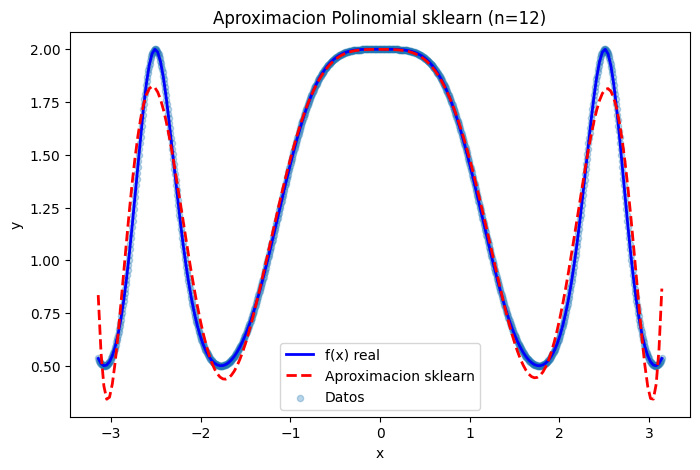

In [27]:
# Grafica de la solucion
x_plot = np.linspace(-np.pi, np.pi, 200).reshape(-1, 1)
y_plot_pred = model.predict(x_plot)
y_true = 2 ** np.cos(x_plot.flatten() ** 2)

plt.figure(figsize=(8, 5))
plt.plot(x_plot, y_true, 'b-', label='f(x) real', linewidth=2)
plt.plot(x_plot, y_plot_pred, 'r--', label='Aproximacion sklearn', linewidth=2)
plt.scatter(x, y, alpha=0.3, s=20, label='Datos')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Aproximacion Polinomial sklearn (n={n})')
plt.legend()
plt.show()

---

# Problema 5

Resuelve el problema 3 usando las ecuaciones normales de regresión polinomial. Compara las soluciones de ambos problemas y escribe tus conclusiones.

In [28]:
# Librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
# Generar datos (mismos que en el Problema 3)
np.random.seed(14)
m = 100
x = np.linspace(-np.pi, np.pi, m)
y = 2 ** np.cos(x ** 2)

# Grado del polinomio
n = 12

In [30]:
# Crear matriz de caracteristicas
def create_poly_features(x, degree):
    X = np.column_stack([x ** j for j in range(degree + 1)])
    return X

X = create_poly_features(x, n)

In [31]:
# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ecuaciones normales: θ = (X^T X)^(-1) X^T y
theta = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ y_train

y_train_pred = X_train @ theta
y_test_pred = X_test @ theta

print(f"=== Regresión Polinomial (Ecuaciones Normales) n={n} ===")
print(f"Train - MSE: {mean_squared_error(y_train, y_train_pred):.6f}, R2: {r2_score(y_train, y_train_pred):.4f}")
print(f"Test  - MSE: {mean_squared_error(y_test, y_test_pred):.6f}, R2: {r2_score(y_test, y_test_pred):.4f}")

=== Regresión Polinomial (Ecuaciones Normales) n=12 ===
Train - MSE: 0.006276, R2: 0.9804
Test  - MSE: 0.027940, R2: 0.9223


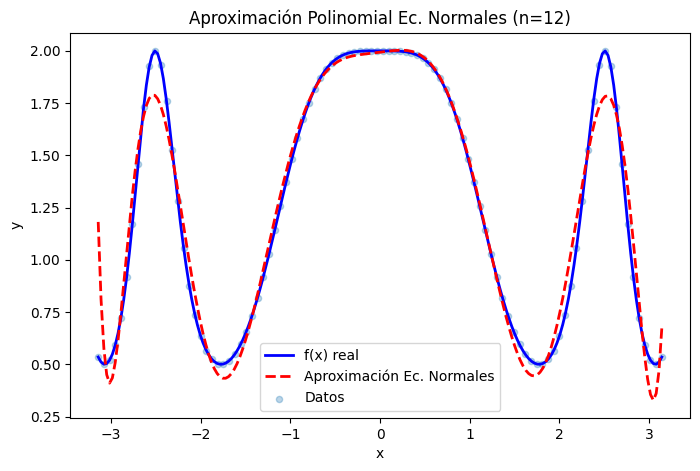

In [32]:
# Gráfica de la solución
x_plot = np.linspace(-np.pi, np.pi, 200)
X_plot = create_poly_features(x_plot, n)
y_plot_pred = X_plot @ theta
y_true = 2 ** np.cos(x_plot ** 2)

plt.figure(figsize=(8, 5))
plt.plot(x_plot, y_true, 'b-', label='f(x) real', linewidth=2)
plt.plot(x_plot, y_plot_pred, 'r--', label='Aproximación Ec. Normales', linewidth=2)
plt.scatter(x, y, alpha=0.3, s=20, label='Datos')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Aproximación Polinomial Ec. Normales (n={n})')
plt.legend()
plt.show()

---

# Problema 6

Considere el problema 3, pero esta vez utilizando un modelo lineal. Dibuje las curvas de aprendizaje asociadas. ¿Qué concluye?

In [33]:
# Librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve

In [34]:
# Generar datos (mismos que en el Problema 3)
np.random.seed(14)
m = 100
x = np.linspace(-np.pi, np.pi, m).reshape(-1, 1)
y = 2 ** np.cos(x.flatten() ** 2)

In [35]:
# Modelo lineal
model_linear = LinearRegression()

# Curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    model_linear, x, y, cv=5, 
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error'
)

train_mse = -train_scores.mean(axis=1)
test_mse = -test_scores.mean(axis=1)

# Entrenar modelo completo para métricas finales
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model_linear.fit(x_train, y_train)

y_train_pred = model_linear.predict(x_train)
y_test_pred = model_linear.predict(x_test)

print("=== Modelo Lineal para f(x) = 2^cos(x²) ===")
print(f"Train - MSE: {mean_squared_error(y_train, y_train_pred):.6f}, R²: {r2_score(y_train, y_train_pred):.4f}")
print(f"Test  - MSE: {mean_squared_error(y_test, y_test_pred):.6f}, R²: {r2_score(y_test, y_test_pred):.4f}")

=== Modelo Lineal para f(x) = 2^cos(x²) ===
Train - MSE: 0.320026, R²: 0.0002
Test  - MSE: 0.374073, R²: -0.0405


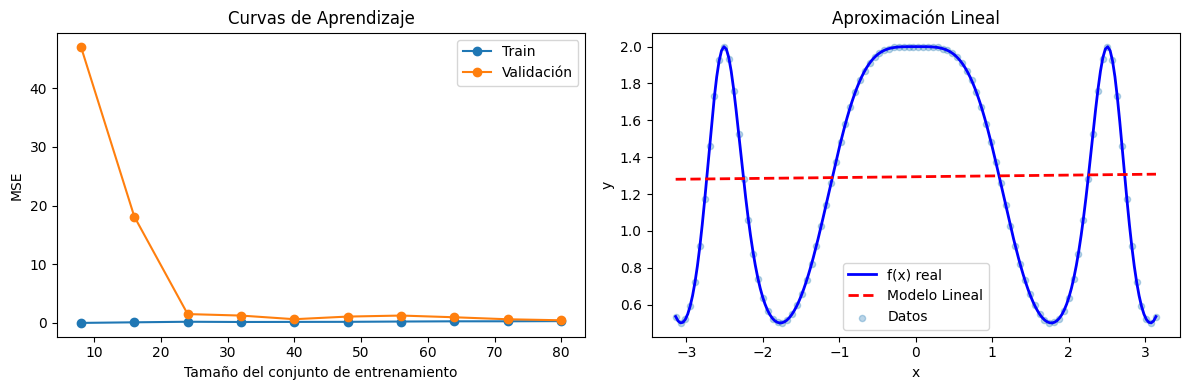

In [36]:
# Gráficas
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Curvas de aprendizaje
axes[0].plot(train_sizes, train_mse, 'o-', label='Train')
axes[0].plot(train_sizes, test_mse, 'o-', label='Validación')
axes[0].set_xlabel('Tamaño del conjunto de entrenamiento')
axes[0].set_ylabel('MSE')
axes[0].set_title('Curvas de Aprendizaje')
axes[0].legend()

# Aproximación
x_plot = np.linspace(-np.pi, np.pi, 200).reshape(-1, 1)
y_plot_pred = model_linear.predict(x_plot)
y_true = 2 ** np.cos(x_plot.flatten() ** 2)

axes[1].plot(x_plot, y_true, 'b-', label='f(x) real', linewidth=2)
axes[1].plot(x_plot, y_plot_pred, 'r--', label='Modelo Lineal', linewidth=2)
axes[1].scatter(x, y, alpha=0.3, s=20, label='Datos')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title('Aproximación Lineal')
axes[1].legend()

plt.tight_layout()
plt.show()

---

# Problema 7
Considere la siguiente función:

$f(x) = 2x^2 - 5, \qquad x \in \mathcal{I} = [-\pi, \pi].$

Use regresión polinomial con $n = 20$. Grafique las curvas de aprendizaje asociadas. ¿Qué concluye?

In [37]:
# Librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import learning_curve
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [38]:
# Generar datos
np.random.seed(14)
m = 100
x = np.linspace(-np.pi, np.pi, m).reshape(-1, 1)
y = 2 * x.flatten() ** 2 - 5

In [39]:
# Crear features polinomiales n=20
n = 20
poly = PolynomialFeatures(degree=n)
X_poly = poly.fit_transform(x)

# Normalizar
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

In [40]:
# Modelo con SGDRegressor (permite controlar iteraciones)
model = SGDRegressor(max_iter=1000, tol=1e-6, eta0=0.01, random_state=14)

# Curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    model, X_poly_scaled, y, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error'
)

train_mse = -train_scores.mean(axis=1)
test_mse = -test_scores.mean(axis=1)

# Entrenar modelo completo
X_train, X_test, y_train, y_test = train_test_split(X_poly_scaled, y, test_size=0.2, random_state=14)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

/home/zamax/miniconda3/envs/micd/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/zamax/miniconda3/envs/micd/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/zamax/miniconda3/envs/micd/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/zamax/miniconda3/envs/micd/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fi

In [41]:
print(f"=== Regresión Polinomial n={n} para f(x) = 2x² - 5 ===")
print(f"Iteraciones: 1000")
print(f"Train - MSE: {mean_squared_error(y_train, y_train_pred):.6f}, R2: {r2_score(y_train, y_train_pred):.4f}")
print(f"Test  - MSE: {mean_squared_error(y_test, y_test_pred):.6f}, R2: {r2_score(y_test, y_test_pred):.4f}")


=== Regresión Polinomial n=20 para f(x) = 2x² - 5 ===
Iteraciones: 1000
Train - MSE: 0.010867, R2: 0.9997
Test  - MSE: 0.012839, R2: 0.9997


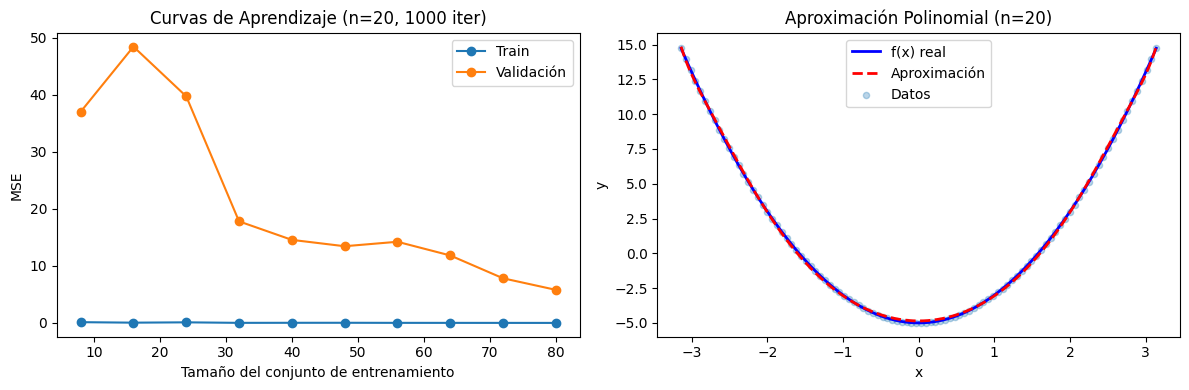

In [42]:
# Gráficas
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Curvas de aprendizaje
axes[0].plot(train_sizes, train_mse, 'o-', label='Train')
axes[0].plot(train_sizes, test_mse, 'o-', label='Validación')
axes[0].set_xlabel('Tamaño del conjunto de entrenamiento')
axes[0].set_ylabel('MSE')
axes[0].set_title(f'Curvas de Aprendizaje (n={n}, 1000 iter)')
axes[0].legend()

# Aproximación
x_plot = np.linspace(-np.pi, np.pi, 200).reshape(-1, 1)
X_plot_poly = poly.transform(x_plot)
X_plot_scaled = scaler.transform(X_plot_poly)
y_plot_pred = model.predict(X_plot_scaled)
y_true = 2 * x_plot.flatten() ** 2 - 5

axes[1].plot(x_plot, y_true, 'b-', label='f(x) real', linewidth=2)
axes[1].plot(x_plot, y_plot_pred, 'r--', label='Aproximación', linewidth=2)
axes[1].scatter(x, y, alpha=0.3, s=20, label='Datos')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title(f'Aproximación Polinomial (n={n})')
axes[1].legend()

plt.tight_layout()
plt.show()

---

# Problema 8

Considere el problema 7, pero esta vez use solo 5 iteraciones para el entrenamiento. Dibuje las curvas de aprendizaje asociadas. ¿Qué concluye?

In [43]:
# Librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import learning_curve
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [44]:
# Generar datos
np.random.seed(14)
m = 100
x = np.linspace(-np.pi, np.pi, m).reshape(-1, 1)
y = 2 * x.flatten() ** 2 - 5

In [45]:
# Crear features polinomiales n=20
n = 20
poly = PolynomialFeatures(degree=n)
X_poly = poly.fit_transform(x)

# Normalizar
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

In [46]:
# Modelo con SGDRegressor (permite controlar iteraciones)
model = SGDRegressor(max_iter=5, tol=1e-6, eta0=0.01, random_state=14)

# Curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    model, X_poly_scaled, y, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error'
)

train_mse = -train_scores.mean(axis=1)
test_mse = -test_scores.mean(axis=1)

# Entrenar modelo completo
X_train, X_test, y_train, y_test = train_test_split(X_poly_scaled, y, test_size=0.2, random_state=14)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

/home/zamax/miniconda3/envs/micd/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/zamax/miniconda3/envs/micd/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/zamax/miniconda3/envs/micd/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/zamax/miniconda3/envs/micd/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fi

In [47]:
print(f"=== Regresión Polinomial n={n} para f(x) = 2x² - 5 ===")
print(f"Iteraciones: 5")
print(f"Train - MSE: {mean_squared_error(y_train, y_train_pred):.6f}, R2: {r2_score(y_train, y_train_pred):.4f}")
print(f"Test  - MSE: {mean_squared_error(y_test, y_test_pred):.6f}, R2: {r2_score(y_test, y_test_pred):.4f}")


=== Regresión Polinomial n=20 para f(x) = 2x² - 5 ===
Iteraciones: 5
Train - MSE: 3.194353, R2: 0.9097
Test  - MSE: 2.698958, R2: 0.9303


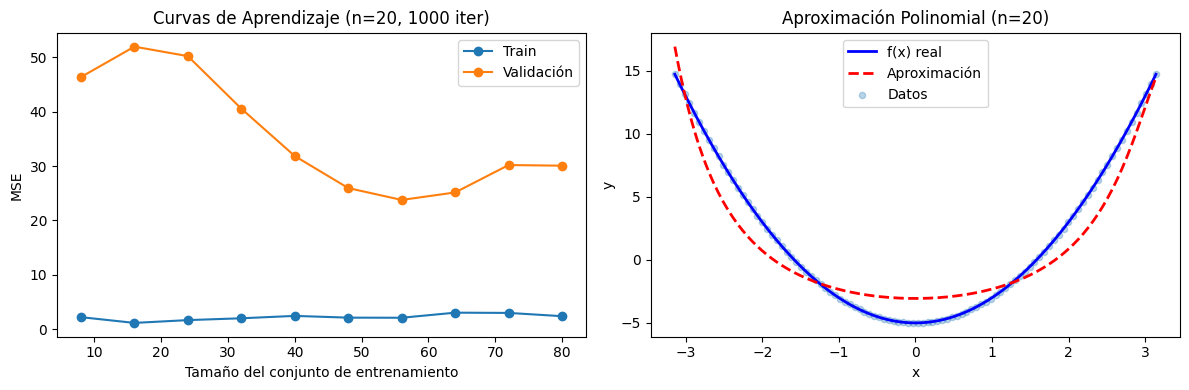

In [48]:
# Gráficas
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Curvas de aprendizaje
axes[0].plot(train_sizes, train_mse, 'o-', label='Train')
axes[0].plot(train_sizes, test_mse, 'o-', label='Validación')
axes[0].set_xlabel('Tamaño del conjunto de entrenamiento')
axes[0].set_ylabel('MSE')
axes[0].set_title(f'Curvas de Aprendizaje (n={n}, 1000 iter)')
axes[0].legend()

# Aproximación
x_plot = np.linspace(-np.pi, np.pi, 200).reshape(-1, 1)
X_plot_poly = poly.transform(x_plot)
X_plot_scaled = scaler.transform(X_plot_poly)
y_plot_pred = model.predict(X_plot_scaled)
y_true = 2 * x_plot.flatten() ** 2 - 5

axes[1].plot(x_plot, y_true, 'b-', label='f(x) real', linewidth=2)
axes[1].plot(x_plot, y_plot_pred, 'r--', label='Aproximación', linewidth=2)
axes[1].scatter(x, y, alpha=0.3, s=20, label='Datos')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title(f'Aproximación Polinomial (n={n})')
axes[1].legend()

plt.tight_layout()
plt.show()

---

# Problema 9

Considere el problema 7, pero esta vez, agregue la regularización L2. Anote sus resultados.

In [49]:
# Librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

In [50]:
# Generar datos
np.random.seed(14)
m = 100
x = np.linspace(-np.pi, np.pi, m).reshape(-1, 1)
y = 2 * x.flatten() ** 2 - 5

In [51]:
# Crear features polinomiales n=20
n = 20
poly = PolynomialFeatures(degree=n)
X_poly = poly.fit_transform(x)

# Normalizar
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

In [52]:
# Modelo Ridge (L2)
model_ridge = Ridge(alpha=1.0)

# Curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    model_ridge, X_poly_scaled, y, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error'
)

train_mse = -train_scores.mean(axis=1)
test_mse = -test_scores.mean(axis=1)

# Entrenar modelo completo
X_train, X_test, y_train, y_test = train_test_split(X_poly_scaled, y, test_size=0.2, random_state=42)
model_ridge.fit(X_train, y_train)

y_train_pred = model_ridge.predict(X_train)
y_test_pred = model_ridge.predict(X_test)

In [53]:
print(f"=== Regresión Polinomial n={n} con Ridge (L2) ===")
print(f"Alpha: 1.0")
print(f"Train - MSE: {mean_squared_error(y_train, y_train_pred):.6f}, R2: {r2_score(y_train, y_train_pred):.4f}")
print(f"Test  - MSE: {mean_squared_error(y_test, y_test_pred):.6f}, R2: {r2_score(y_test, y_test_pred):.4f}")


=== Regresión Polinomial n=20 con Ridge (L2) ===
Alpha: 1.0
Train - MSE: 0.036574, R2: 0.9990
Test  - MSE: 0.045137, R2: 0.9985


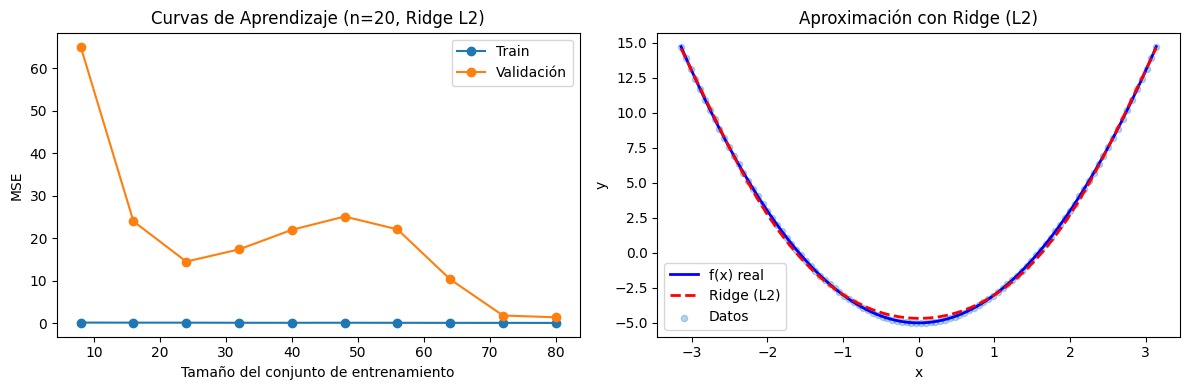

In [54]:
# Gráficas
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Curvas de aprendizaje
axes[0].plot(train_sizes, train_mse, 'o-', label='Train')
axes[0].plot(train_sizes, test_mse, 'o-', label='Validación')
axes[0].set_xlabel('Tamaño del conjunto de entrenamiento')
axes[0].set_ylabel('MSE')
axes[0].set_title(f'Curvas de Aprendizaje (n={n}, Ridge L2)')
axes[0].legend()

# Aproximación
x_plot = np.linspace(-np.pi, np.pi, 200).reshape(-1, 1)
X_plot_poly = poly.transform(x_plot)
X_plot_scaled = scaler.transform(X_plot_poly)
y_plot_pred = model_ridge.predict(X_plot_scaled)
y_true = 2 * x_plot.flatten() ** 2 - 5

axes[1].plot(x_plot, y_true, 'b-', label='f(x) real', linewidth=2)
axes[1].plot(x_plot, y_plot_pred, 'r--', label='Ridge (L2)', linewidth=2)
axes[1].scatter(x, y, alpha=0.3, s=20, label='Datos')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title(f'Aproximación con Ridge (L2)')
axes[1].legend()

plt.tight_layout()
plt.show()

---

# Problema 10
Considere el problema 7, pero esta vez, añada la regularización L1. Anote sus resultados y compárelos con los del problema 10.

In [55]:
# Librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

In [56]:
# Generar datos
np.random.seed(14)
m = 100
x = np.linspace(-np.pi, np.pi, m).reshape(-1, 1)
y = 2 * x.flatten() ** 2 - 5

In [57]:
# Crear features polinomiales n=20
n = 20
poly = PolynomialFeatures(degree=n)
X_poly = poly.fit_transform(x)

# Normalizar
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

In [58]:
# Modelo Lasso (L1)
model_lasso = Lasso(alpha=0.1, max_iter=1000)

# Curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    model_lasso, X_poly_scaled, y, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='neg_mean_squared_error'
)

train_mse = -train_scores.mean(axis=1)
test_mse = -test_scores.mean(axis=1)

# Entrenar modelo completo
X_train, X_test, y_train, y_test = train_test_split(X_poly_scaled, y, test_size=0.2, random_state=42)
model_lasso.fit(X_train, y_train)

y_train_pred = model_lasso.predict(X_train)
y_test_pred = model_lasso.predict(X_test)

In [59]:
print(f"=== Regresión Polinomial n={n} con Lasso (L1) ===")
print(f"Alpha: 0.1")
print(f"Train - MSE: {mean_squared_error(y_train, y_train_pred):.6f}, R2: {r2_score(y_train, y_train_pred):.4f}")
print(f"Test  - MSE: {mean_squared_error(y_test, y_test_pred):.6f}, R2: {r2_score(y_test, y_test_pred):.4f}")


=== Regresión Polinomial n=20 con Lasso (L1) ===
Alpha: 0.1
Train - MSE: 0.009612, R2: 0.9997
Test  - MSE: 0.007749, R2: 0.9997


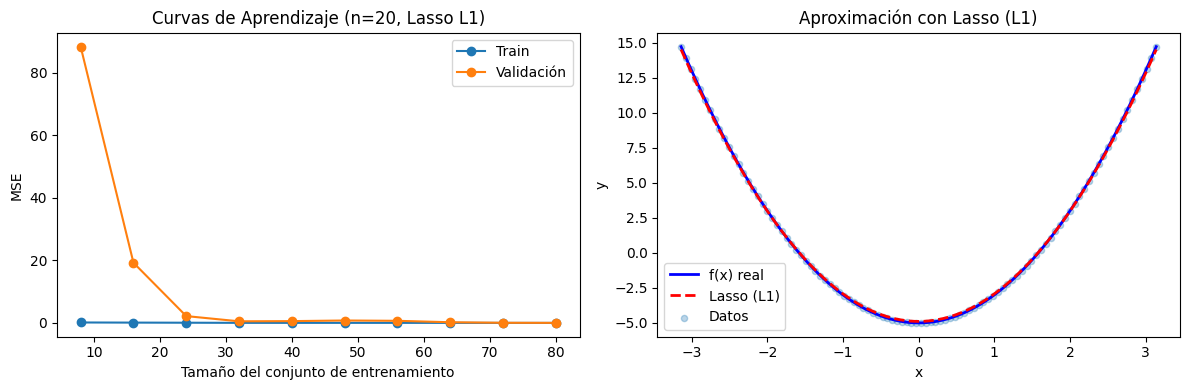

In [60]:
# Gráficas
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Curvas de aprendizaje
axes[0].plot(train_sizes, train_mse, 'o-', label='Train')
axes[0].plot(train_sizes, test_mse, 'o-', label='Validación')
axes[0].set_xlabel('Tamaño del conjunto de entrenamiento')
axes[0].set_ylabel('MSE')
axes[0].set_title(f'Curvas de Aprendizaje (n={n}, Lasso L1)')
axes[0].legend()

# Aproximación
x_plot = np.linspace(-np.pi, np.pi, 200).reshape(-1, 1)
X_plot_poly = poly.transform(x_plot)
X_plot_scaled = scaler.transform(X_plot_poly)
y_plot_pred = model_lasso.predict(X_plot_scaled)
y_true = 2 * x_plot.flatten() ** 2 - 5

axes[1].plot(x_plot, y_true, 'b-', label='f(x) real', linewidth=2)
axes[1].plot(x_plot, y_plot_pred, 'r--', label='Lasso (L1)', linewidth=2)
axes[1].scatter(x, y, alpha=0.3, s=20, label='Datos')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title(f'Aproximación con Lasso (L1)')
axes[1].legend()

plt.tight_layout()
plt.show()